<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1eGbrsVYHM-zKWA3jbF9Z72KrdMZ8ZKgw" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

---
$Imports$

In [1]:
# Data 
import numpy as np
import pandas as pd
# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
# Imputing 
from sklearn.impute import SimpleImputer
# Encoder 
from sklearn.preprocessing import LabelEncoder
# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Spliting
from sklearn.model_selection import train_test_split
# Resampling 
from sklearn.utils import resample
# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
# Tuning 
from sklearn.model_selection import GridSearchCV
# Evaluation 
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score

---
$DATA$

In [2]:
Data = pd.read_csv("weatherData.csv")

In [3]:
# Let's have a look at the data
Data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


We have various $NaN$ values in "Evaporation" and "Sunshine", and have categorical data as well, various mid-data NaN values like in "Cloud9am","Cloud3pm",and some unnecessary columns like "Date", "Evaporation" and "Sunshine".

In [4]:
# Let's remove unwanted columns 
unwanted_cols = ["Date","Evaporation", "Sunshine","WindGustDir","WindDir9am","WindDir3pm"]
for i in unwanted_cols:
  Data.pop(i)

In [5]:
Data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


So now we have more important data with us.

In [6]:
# What about null values?
Data.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustSpeed  135197 non-null  float64
 5   WindSpeed9am   143693 non-null  float64
 6   WindSpeed3pm   142398 non-null  float64
 7   Humidity9am    142806 non-null  float64
 8   Humidity3pm    140953 non-null  float64
 9   Pressure9am    130395 non-null  float64
 10  Pressure3pm    130432 non-null  float64
 11  Cloud9am       89572 non-null   float64
 12  Cloud3pm       86102 non-null   float64
 13  Temp9am        143693 non-null  float64
 14  Temp3pm        141851 non-null  float64
 15  RainToday      142199 non-null  object 
 16  RainTomorrow   142193 non-null  object 
dtypes: float64(14), object(3)
mem

---
$Mapping$

In [8]:
Map = {"No":0,"Yes":1}
Data["RainToday"] = Data["RainToday"].map(Map)
Data["RainTomorrow"] = Data["RainTomorrow"].map(Map)

---
$Encoding$ :  

Let's transform this ordinal data columns to nominal data columns usiing mapping technique.  

In [9]:
Cat_cols = ["Location"]
for i in Cat_cols:
  LE = LabelEncoder()
  Data[i] = LE.fit_transform(Data[i])

In [10]:
Data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


---
$Imputing$

In [11]:
mode_imputing_cols = ["RainToday","RainTomorrow"]

We want either 0 or 1 in "RainToday", "RainTomorrow". Thus, to do so we can use Mode Imputing Technique.

In [12]:
Mode_imp = SimpleImputer(strategy="most_frequent")
for cols in mode_imputing_cols:
  X = np.array(Data[cols]).reshape(-1,1)
  Data[cols] = Mode_imp.fit_transform(X)

In [13]:
# Let's again check null values for confirmation 
Data.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

$Great!!$, Now let's Impute other columns.

In [14]:
mean_impute_cols = ["MinTemp","MaxTemp","Rainfall","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm"]
for col in mean_impute_cols:
  Si = SimpleImputer(strategy="mean")
  X = np.array(Data[col]).reshape(-1,1)
  Data[col]  = Si.fit_transform(X) 

In [15]:
# Let's confirm 
Data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,2,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,2,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,2,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0


In [16]:
Data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

$Great!!$ The data is ready for models to train, but before that let's check the insights of the data.

----

---
$Basic$ $EDA$

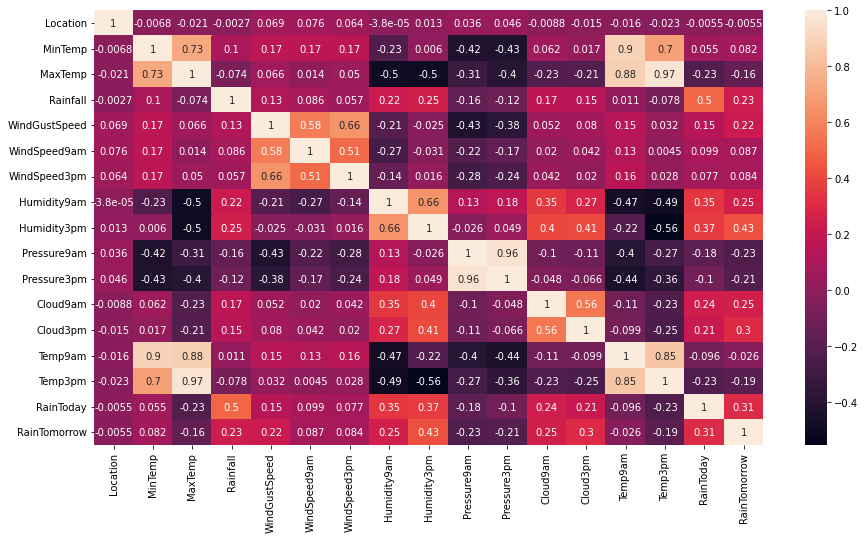

In [17]:
plt.figure(figsize=(15,8))
Corr = Data.corr()
sns.heatmap(Corr,annot=True)
plt.show()

We can clearly spot some strong and genuine correations like "Humidity" and "MaxTemp" has a strong -ve relation, just like that "Pressure" and "MinTemp" also have strong -ve relation.

In [18]:
y = np.bincount(Data['RainTomorrow'])
mylabels = ["No","Yes"]

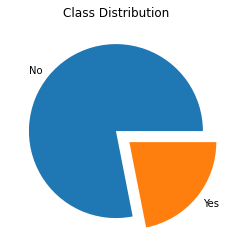

In [19]:
plt.pie(y,labels=mylabels,explode=[0,0.2])
plt.title("Class Distribution")
plt.show()

There is high class imbalance. Let's plot some of the strong correlations.

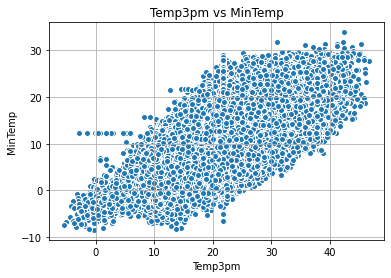

In [20]:
plt.scatter(Data["Temp3pm"],Data["MinTemp"],edgecolors="white")
plt.grid()
plt.title("Temp3pm vs MinTemp")
plt.xlabel("Temp3pm")
plt.ylabel("MinTemp")
plt.show()

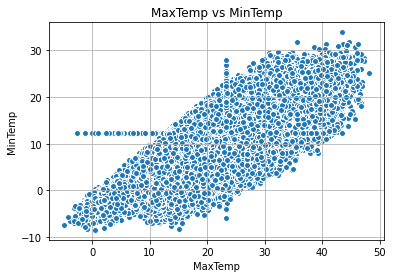

In [21]:
plt.scatter(Data["MaxTemp"],Data["MinTemp"],edgecolors="white")
plt.grid()
plt.title("MaxTemp vs MinTemp")
plt.xlabel("MaxTemp")
plt.ylabel("MinTemp")
plt.show()

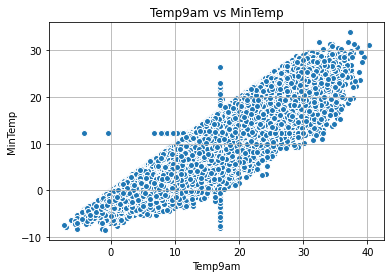

In [22]:
plt.scatter(Data["Temp9am"],Data["MinTemp"],edgecolors="white")
plt.grid()
plt.title("Temp9am vs MinTemp")
plt.xlabel("Temp9am")
plt.ylabel("MinTemp")
plt.show()

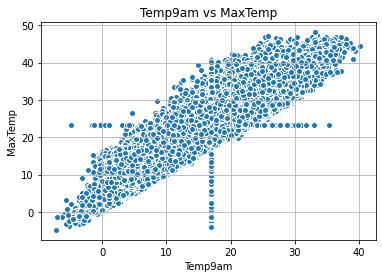

In [23]:
plt.scatter(Data["Temp9am"],Data["MaxTemp"],edgecolors="white")
plt.grid()
plt.title("Temp9am vs MaxTemp")
plt.xlabel("Temp9am")
plt.ylabel("MaxTemp")
plt.show()

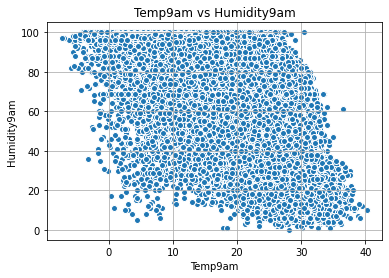

In [24]:
plt.scatter(Data["Temp9am"],Data["Humidity9am"],edgecolors="white")
plt.grid()
plt.title("Temp9am vs Humidity9am")
plt.xlabel("Temp9am")
plt.ylabel("Humidity9am")
plt.show()

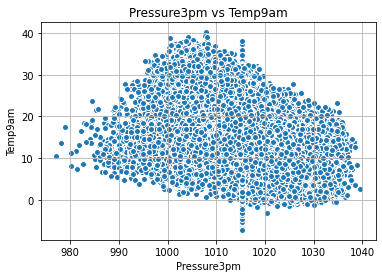

In [25]:
plt.scatter(Data["Pressure3pm"],Data["Temp9am"],edgecolors="white")
plt.grid()
plt.title("Pressure3pm vs Temp9am")
plt.xlabel("Pressure3pm")
plt.ylabel("Temp9am")
plt.show()

The correlations are right, the data distribution is linear.

---
$Scalling$

Scalling the data can help us.

In [26]:
Y_data = Data.pop("RainTomorrow")
X_data = Data

In [27]:
Sc = StandardScaler()
X_data_sc = Sc.fit_transform(X_data)

---
$Spliting$

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data_sc,Y_data,test_size=0.2,stratify=Y_data)

In [29]:
print(f"Class DIstribution Train : {np.bincount(Y_train)}") # The data is highly imbalanced
print(f"Class DIstribution Test : {np.bincount(Y_test)}") # The data is highly imbalanced

Class DIstribution Train : [90866 25502]
Class DIstribution Test : [22717  6375]


We should try resampling the data.

---
$Resampling$

In [30]:
X_upsampled_train, Y_upsampled_train = resample(X_train[Y_train==1],Y_train[Y_train==1],replace=True,n_samples=90866)
X_upsampled_test, Y_upsampled_test = resample(X_test[Y_test==1],Y_test[Y_test==1],replace=True,n_samples=22717)

In [31]:
print(f"Train CD : {np.bincount(Y_upsampled_train)}")
print(f"Test CD : {np.bincount(Y_upsampled_test)}")

Train CD : [    0 90866]
Test CD : [    0 22717]


In [32]:
X_bal_train =np.vstack((X_train[Y_train==0],X_upsampled_train))
Y_bal_train =np.hstack((Y_train[Y_train==0],Y_upsampled_train))
X_bal_test =np.vstack((X_test[Y_test==0],X_upsampled_test))
Y_bal_test =np.hstack((Y_test[Y_test==0],Y_upsampled_test))

---
$Random$ $Forest$ $Classifier$

In [33]:
rfc = RandomForestClassifier(max_depth=50)
rfc.fit(X_bal_train,Y_bal_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
# f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
def Eval(model,X,y):
    y_pred = model.predict(X)
    acc_ = accuracy_score(y,y_pred)
    cm = confusion_matrix(y,y_pred)
    p_score, r_score = precision_score(y,y_pred), recall_score(y,y_pred)
    f1_ = f1_score(y,y_pred)
    return acc_, cm, p_score, r_score, f1_

In [35]:
Accuracy_RFC, CM_RFC, precision_RFC, recall_RFC, f1_RFC = Eval(rfc,X_bal_test,Y_bal_test)
print(f"Accuracy_RFC : {Accuracy_RFC}, \n CM_RFC : \n {CM_RFC}, \n Precision_RFC : {precision_RFC} \n Recall_RFC : {recall_RFC}, \n F1_RFC Score : {f1_RFC}")

Accuracy_RFC : 0.7423515428973896, 
 CM_RFC : 
 [[21173  1544]
 [10162 12555]], 
 Precision_RFC : 0.890488687140932 
 Recall_RFC : 0.5526698067526522, 
 F1_RFC Score : 0.6820404172099087


We have a good precision but the recall is bad. The accuracy is satisfactory but can be improved.

What about performance on the normal imbalamced dataset.

In [36]:
rfc_o = RandomForestClassifier(max_depth=50)
rfc_o.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
Accuracy_RFC_o, CM_RFC_o, precision_RFC_o, recall_RFC_o, f1_RFC_o = Eval(rfc_o,X_bal_test,Y_bal_test)
print(f"Accuracy_RFC_o : {Accuracy_RFC_o}, \n CM_RFC_o : \n {CM_RFC_o}, \n Precision_RFC_o : {precision_RFC_o} \n Recall_RFC_o : {recall_RFC_o}, \n F1_RFC_o Score : {f1_RFC_o}")

Accuracy_RFC_o : 0.7223444997138707, 
 CM_RFC_o : 
 [[21631  1086]
 [11529 11188]], 
 Precision_RFC_o : 0.9115202867850741 
 Recall_RFC_o : 0.4924946075626183, 
 F1_RFC_o Score : 0.6394787231002258


This was expected as it has a imbalance in class.

---
$DTC$

In [38]:
dtc = DecisionTreeClassifier(max_depth=20).fit(X_bal_train,Y_bal_train)
Accuracy_DTC, CM_DTC, precision_DTC, recall_DTC, f1_DTC = Eval(dtc,X_bal_test,Y_bal_test)
print(f"Accuracy_DTC : {Accuracy_DTC}, \n CM_DTC : \n {CM_DTC}, \n Precision_DTC : {precision_DTC} \n Recall_DTC : {recall_DTC}, \n F1_DTC Score : {f1_DTC}")

Accuracy_DTC : 0.7000704318351895, 
 CM_DTC : 
 [[19149  3568]
 [10059 12658]], 
 Precision_DTC : 0.7801060027116973 
 Recall_DTC : 0.5572038561429766, 
 F1_DTC Score : 0.6500783195953059


Pretty bad!! than RFC.

---
$AdaBoost$

In [39]:
Ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=50),learning_rate=1.0,n_estimators=100)
Ada.fit(X_bal_train,Y_bal_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=50,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         

In [40]:
Accuracy_ADA, CM_ADA, precision_ADA, recall_ADA, f1_ADA = Eval(Ada,X_bal_test,Y_bal_test)
print(f"Accuracy_ADA : {Accuracy_ADA}, \n CM_ADA : \n {CM_ADA}, \n Precision_ADA : {precision_ADA} \n Recall_ADA : {recall_ADA}, \n F1_ADA Score : {f1_ADA}")

Accuracy_ADA : 0.7208038033191002, 
 CM_ADA : 
 [[20335  2382]
 [10303 12414]], 
 Precision_ADA : 0.8390105433901054 
 Recall_ADA : 0.546463001276577, 
 F1_ADA Score : 0.6618505584730626


The accuracy is comparetively low but there is a increase in both Precision and Recall, thus a increase in F1 Score.

---
$Bagging$ 

In [41]:
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=50),bootstrap=True,warm_start=True,n_estimators=100)
bag_clf.fit(X_bal_train,Y_bal_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=50,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

These models are very close to each other.

In [42]:

Accuracy_BAG, CM_BAG, precision_BAG, recall_BAG, f1_BAG = Eval(bag_clf,X_bal_test,Y_bal_test)
print(f"Accuracy_BAG : {Accuracy_BAG}, \n CM_BAG : \n {CM_BAG}, \n Precision_BAG : {precision_BAG} \n Recall_BAG : {recall_BAG}, \n F1_BAG Score : {f1_BAG}")

Accuracy_BAG : 0.7436061099617027, 
 CM_BAG : 
 [[21049  1668]
 [ 9981 12736]], 
 Precision_BAG : 0.8841988336573174 
 Recall_BAG : 0.5606374081084651, 
 F1_BAG Score : 0.686188410872552


The accuracy is relatively high, but we can spot a bad recall which degrades the performance.

---
$Visualization$ of $Performance$

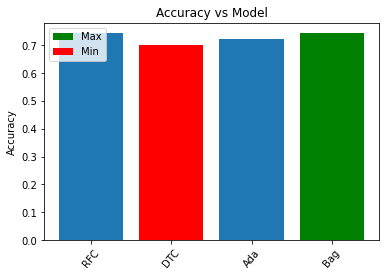

In [43]:
# Accuracy vs Models 
model = ["RFC","DTC","Ada","Bag"]
Acc_ = [Accuracy_RFC,Accuracy_DTC,Accuracy_ADA,Accuracy_BAG]
plt.bar(model,Acc_)
plt.bar(model[Acc_.index(np.max(Acc_))],np.max(Acc_),color="green",label="Max")
plt.bar(model[Acc_.index(np.min(Acc_))],np.min(Acc_),color="red",label="Min")
plt.title("Accuracy vs Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=50)
plt.legend()
plt.show()

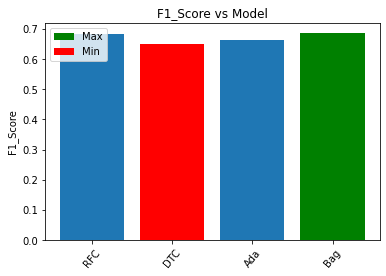

In [44]:
# F1_Score vs Models 
model = ["RFC","DTC","Ada","Bag"]
f1_ = [f1_RFC,f1_DTC,f1_ADA,f1_BAG]
plt.bar(model,f1_)
plt.bar(model[f1_.index(np.max(f1_))],np.max(f1_),color="green",label="Max")
plt.bar(model[f1_.index(np.min(f1_))],np.min(f1_),color="red",label="Min")
plt.title("F1_Score vs Model")
plt.ylabel("F1_Score")
plt.xticks(rotation=50)
plt.legend()
plt.show()

We can tell directly from the above two graphs that the BaggingClassifier works the best for us and we can use it, paying accuracy. 